In [1]:
from pathlib import Path

from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

import numpy as np

In [2]:
def read_3d_volume(fileName, nx, ny, nz, dtype=np.float32):

    #print('Reading 3D volume file: ', fileName)
    f = open(fileName, "rb")
    data = np.fromfile(f, dtype=dtype)

    #size = nx*ny*nz
    shape = (nz, ny, nx)

    return data.reshape(shape)

def project_left(vol):
    vol_rot = np.transpose(vol, axes=(2,1,0))
    return np.flipud(np.rot90(np.sum(vol_rot, axis=0)))

def project_top(vol):
    vol_rot = np.transpose(vol, axes=(1,2,0))
    return np.rot90(np.sum(vol_rot, axis=0))

def project_front(vol):
    return np.sum(vol, axis=0)

def make_three_projections(vol):
    
    im1 = project_front(vol)
    m1 = np.mean(im1)
    std1 = np.std(im1)
    
    im2 = project_left(vol)
    m2 = np.mean(im2)
    std2 = np.std(im2)
    
    im3 = project_top(vol)
    m3 = np.mean(im3)
    std3 = np.std(im3)
    
    return (im1, m1, std1), (im2, m2, std2), (im3, m3, std3) 

def read_slice_from_multi_tiff(path, slice_num):
    """
    path - Path to the multipage-tiff file
    n_images - Number of pages in the tiff file
    """
    img = Image.open(path)
    images = []
 
    img.seek(slice_num)
    
    slice_ = np.array(img)
    
    #slice_ = np.zeros((img.height, img.width))
            
    #for j in range(slice_.shape[0]):
    #    for k in range(slice_.shape[1]):
            #print j,k
    #        slice_[j,k] = img.getpixel((k, j))

    return slice_
    

In [ ]:
input_path = Path('z:\\collaborations\\ulm-batteries\\processed\\A2021-031-019033\\Experiment1\\')

## GFA

In [14]:
input_path = Path('z:\\collaborations\\ulm-batteries\\processed\\A2021-031-019033\\Experiment1\\')


slice_num = 650
trim_diff_value = -50

#geometry = "GFD"
#geometry = "GDL"
geometry = "GFA"

dataset = f"{geometry}_2p5"
im1_100 = read_slice_from_multi_tiff(input_path / dataset / f"{dataset}_tomo_0{1}-slices-pr_scaled2_8bit.tif", slice_num)
im2_100 = read_slice_from_multi_tiff(input_path / dataset / f"{dataset}_tomo_0{2}-slices-pr_scaled2_8bit.tif", slice_num)
diff_100 = im1_100.astype(float)-im2_100.astype(float)
diff_100[diff_100 < trim_diff_value] = trim_diff_value

dataset = f"{geometry}_10"
im1_200 = read_slice_from_multi_tiff(input_path / dataset / f"{dataset}_tomo_0{1}-slices-pr_scaled2_8bit.tif", slice_num)
im2_200 = read_slice_from_multi_tiff(input_path / dataset / f"{dataset}_tomo_0{2}-slices-pr_scaled2_8bit.tif", slice_num)
diff_200 = im1_200.astype(float)-im2_200.astype(float)
diff_200[diff_200 < trim_diff_value] = trim_diff_value

dataset = f"{geometry}_20"
im1_300 = read_slice_from_multi_tiff(input_path / dataset / f"{dataset}_tomo_0{1}-slices-pr_scaled2_8bit.tif", slice_num)
im2_300 = read_slice_from_multi_tiff(input_path / dataset / f"{dataset}_tomo_0{2}-slices-pr_scaled2_8bit.tif", slice_num)
diff_300 = im1_300.astype(float)-im2_300.astype(float)
diff_300[diff_300 < trim_diff_value] = trim_diff_value

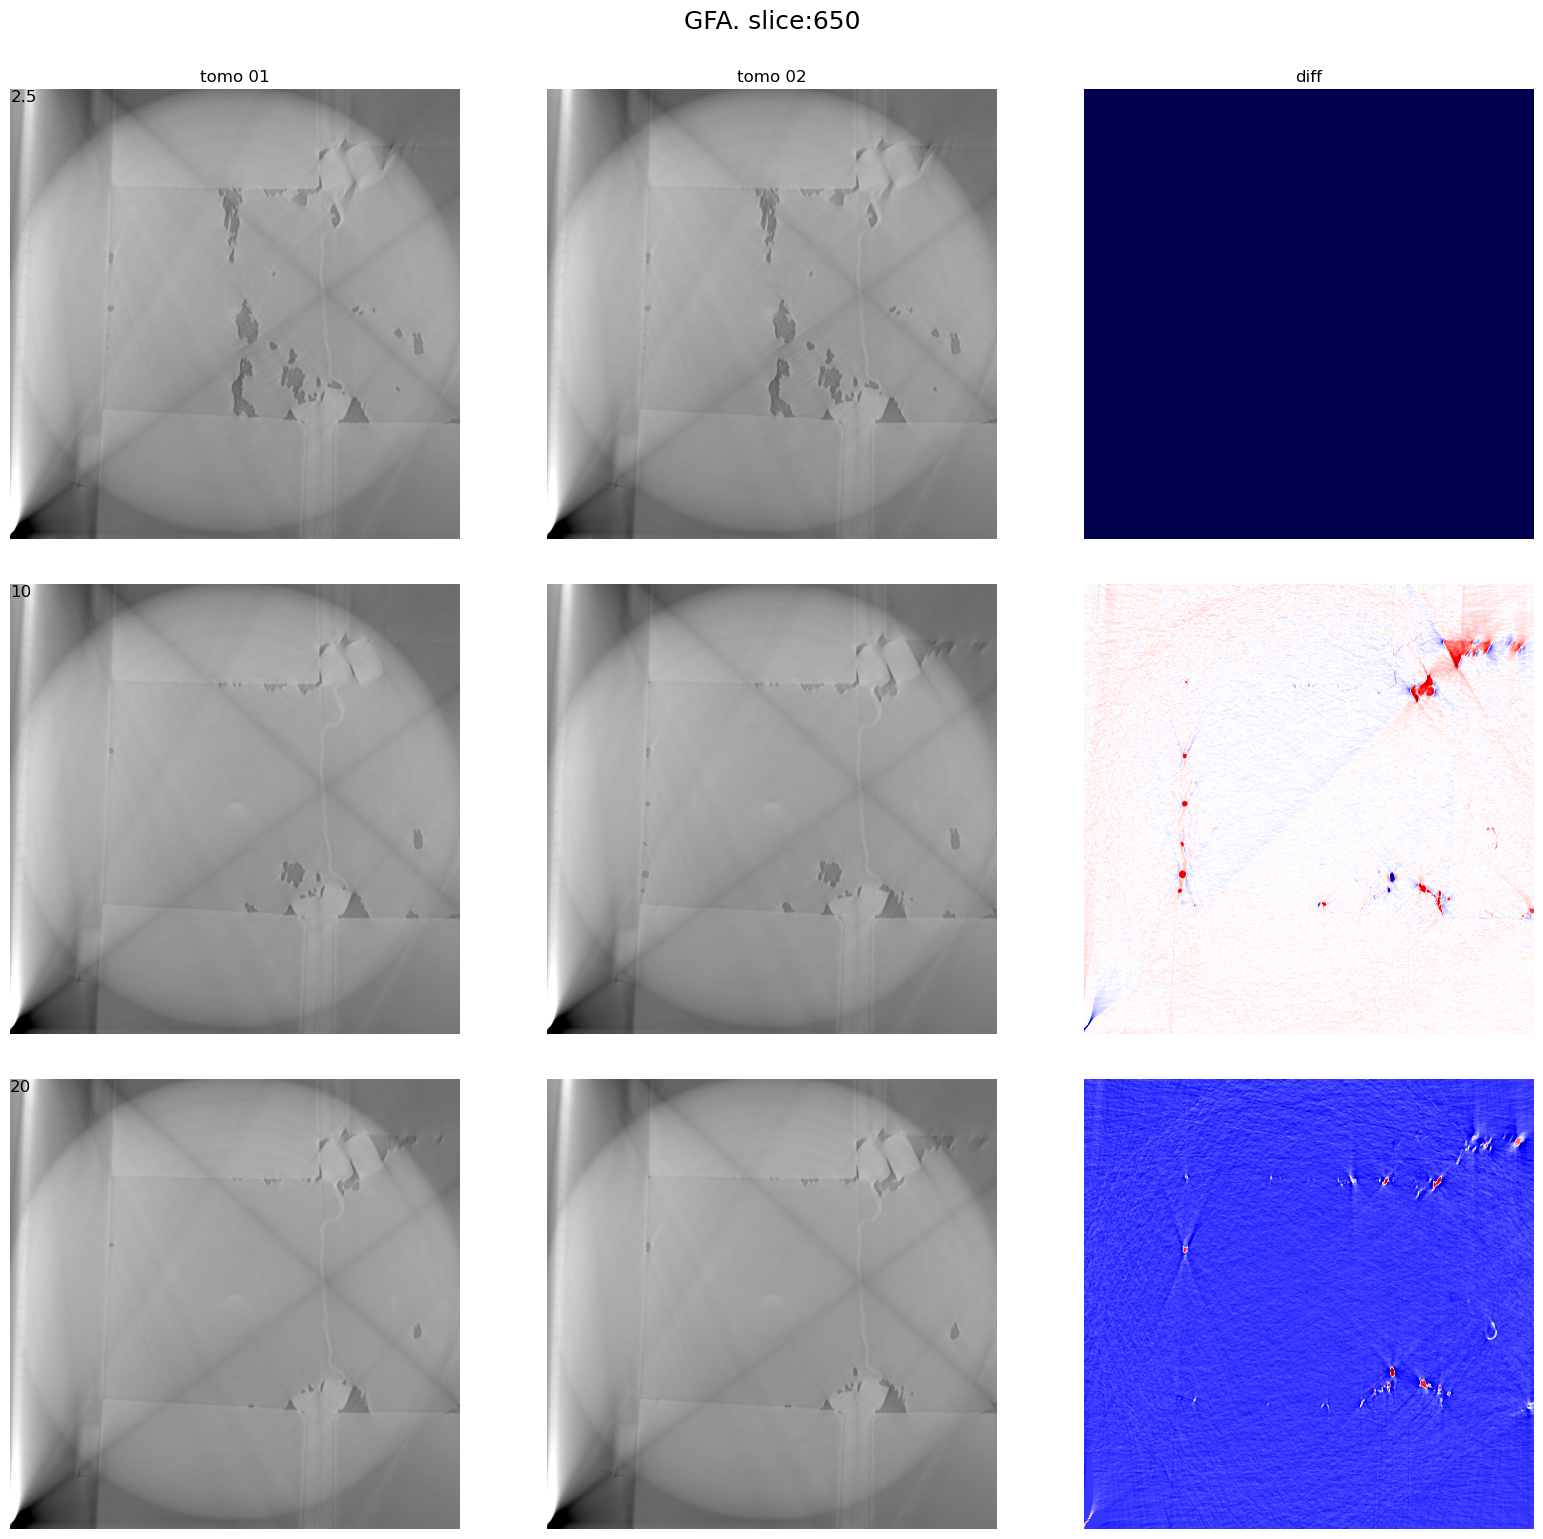

In [15]:
fig = plt.figure()

fig.set_size_inches(16, 16, forward=True)
plt.subplots_adjust(top=0.90, bottom=0.0, left=0.0, right=1.0, wspace=0.02, hspace=0.1 )

gs = gridspec.GridSpec(3, 3)

ax0 = plt.subplot(gs[0, 0])
plt.axis('off')
plt.imshow(im1_100, cmap='gray')
plt.title('tomo 01')
#ax0.set_ylabel('100')
ax0.text(0.2, 0.2, '2.5', va="top", ha="left", fontsize=12)
#ax0.text(0.5, 0.5, 'top view2', va="center", ha="center", fontsize=16)
#ax0.text(0.5, 0.5,"top", va="center", ha="center", fontsize=16)

ax1 = plt.subplot(gs[0, 1])
plt.axis('off')
plt.imshow(im2_100, cmap='gray')
plt.title('tomo 02')

ax2 = plt.subplot(gs[0, 2])
plt.axis('off')
plt.imshow(diff_100, cmap='seismic')
plt.title('diff')

ax3 = plt.subplot(gs[1, 0])
plt.axis('off')
plt.imshow(im1_200, cmap='gray')
ax3.text(0.2, 0.2, '10', va="top", ha="left", fontsize=12)

ax4 = plt.subplot(gs[1, 1])
plt.axis('off')
plt.imshow(im2_200, cmap='gray')

ax5 = plt.subplot(gs[1, 2])
plt.axis('off')
plt.imshow(diff_200, cmap='seismic')



ax6 = plt.subplot(gs[2, 0])
plt.axis('off')
plt.imshow(im1_300, cmap='gray')
ax6.text(0.0, 0.0, '20', va="top", ha="left", fontsize=12)

ax7 = plt.subplot(gs[2, 1])
plt.axis('off')
plt.imshow(im2_300, cmap='gray')

ax8 = plt.subplot(gs[2, 2])
plt.axis('off')
plt.imshow(diff_300, cmap='seismic')


fig.suptitle(f'{geometry}. slice:{slice_num}', x=0.5, y=0.95, fontsize=18, va='top')

fig.savefig(input_path / f'overview_{geometry}.png')
plt.show()

## GFD and GDL

In [29]:
input_path = Path('z:\\collaborations\\ulm-batteries\\processed\\A2021-031-019033\\Experiment3\\')


slice_num = 600
trim_diff_value = -50

geometry = "GDL"
#geometry = "GDF"

dataset = f"{geometry}_2p5"
im1_100 = read_slice_from_multi_tiff(input_path / dataset / f"{dataset}_tomo_0{1}-slices-pr_scaled2_8bit.tif", slice_num)
im2_100 = read_slice_from_multi_tiff(input_path / dataset / f"{dataset}_tomo_0{2}-slices-pr_scaled2_8bit.tif", slice_num)
diff_100 = im1_100.astype(float)-im2_100.astype(float)
diff_100[diff_100 < trim_diff_value] = trim_diff_value

dataset = f"{geometry}_5"
im1_200 = read_slice_from_multi_tiff(input_path / dataset / f"{dataset}_tomo_0{1}-slices-pr_scaled2_8bit.tif", slice_num)
im2_200 = read_slice_from_multi_tiff(input_path / dataset / f"{dataset}_tomo_0{2}-slices-pr_scaled2_8bit.tif", slice_num)
diff_200 = im1_200.astype(float)-im2_200.astype(float)
diff_200[diff_200 < trim_diff_value] = trim_diff_value

dataset = f"{geometry}_10"
im1_300 = read_slice_from_multi_tiff(input_path / dataset / f"{dataset}_tomo_0{1}-slices-pr_scaled2_8bit.tif", slice_num)
im2_300 = read_slice_from_multi_tiff(input_path / dataset / f"{dataset}_tomo_0{2}-slices-pr_scaled2_8bit.tif", slice_num)
diff_300 = im1_300.astype(float)-im2_300.astype(float)
diff_300[diff_300 < trim_diff_value] = trim_diff_value

dataset = f"{geometry}_20"
im1_400 = read_slice_from_multi_tiff(input_path / dataset / f"{dataset}_tomo_0{1}-slices-pr_scaled2_8bit.tif", slice_num)
im2_400 = read_slice_from_multi_tiff(input_path / dataset / f"{dataset}_tomo_0{2}-slices-pr_scaled2_8bit.tif", slice_num)
diff_400 = im1_400.astype(float)-im2_400.astype(float)
diff_400[diff_400 < trim_diff_value] = trim_diff_value

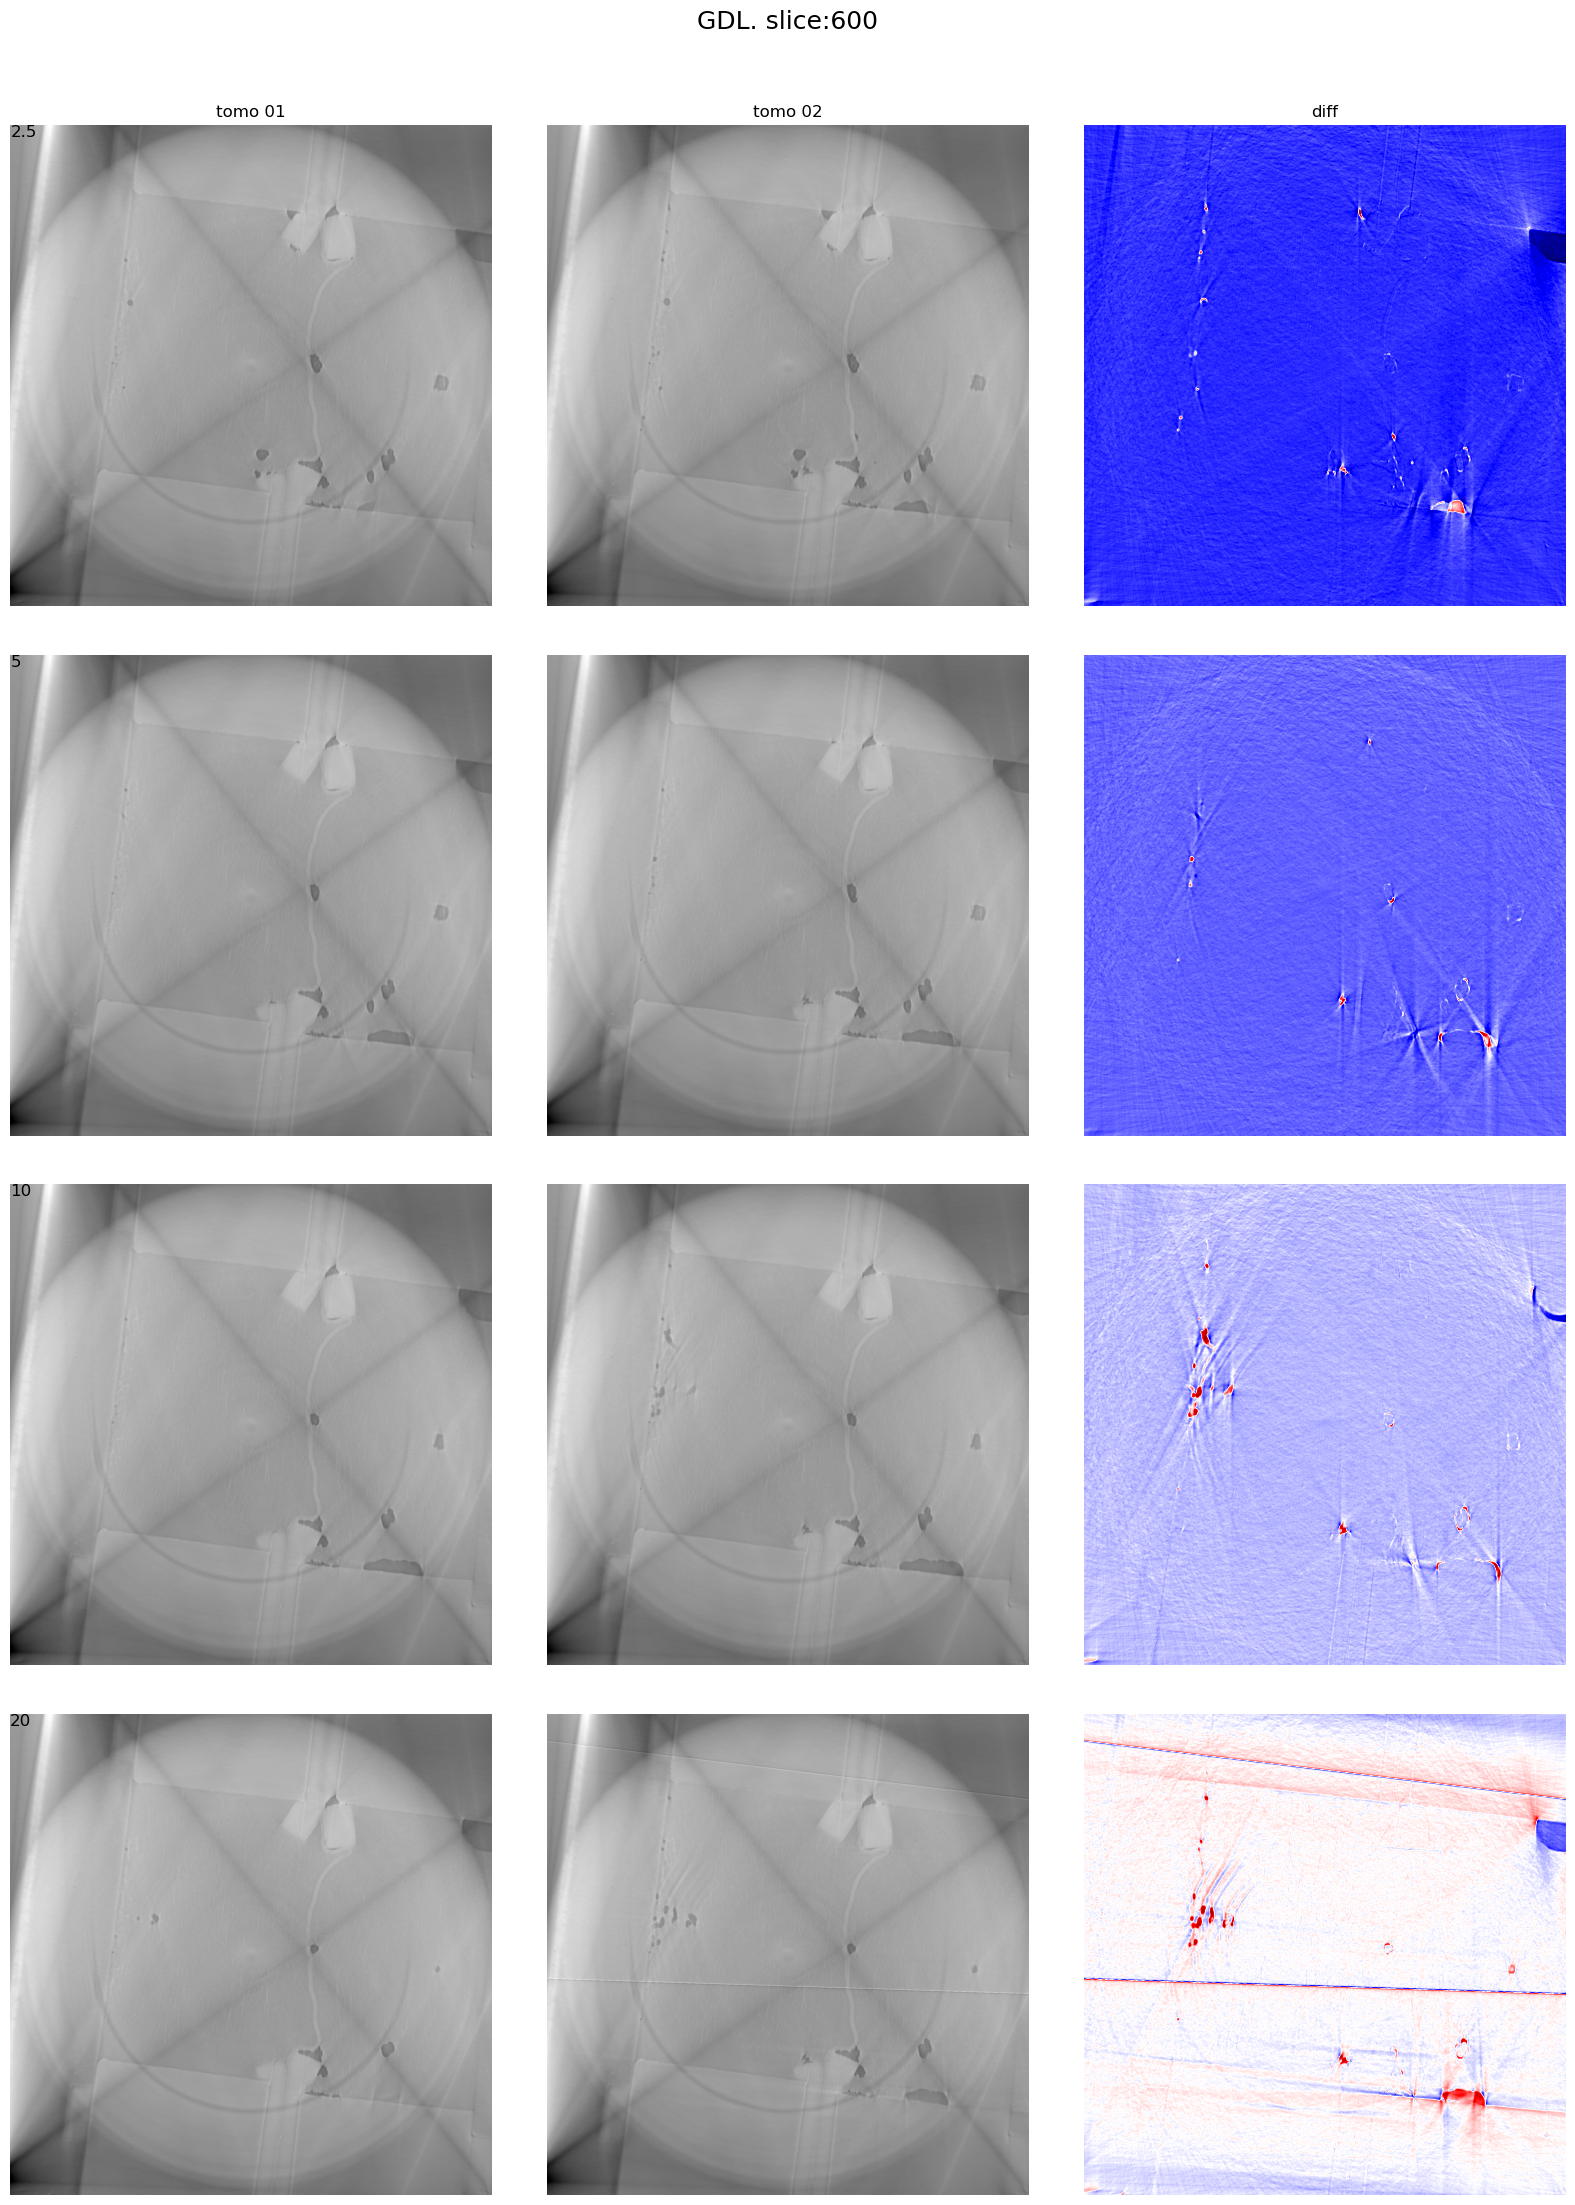

In [30]:
fig = plt.figure()

fig.set_size_inches(16, 23, forward=True)
plt.subplots_adjust(top=0.90, bottom=0.0, left=0.0, right=1.0, wspace=0.02, hspace=0.1 )

gs = gridspec.GridSpec(4, 3)

ax0 = plt.subplot(gs[0, 0])
plt.axis('off')
plt.imshow(im1_100, cmap='gray')
plt.title('tomo 01')
#ax0.set_ylabel('100')
ax0.text(0.2, 0.2, '2.5', va="top", ha="left", fontsize=12)
#ax0.text(0.5, 0.5, 'top view2', va="center", ha="center", fontsize=16)
#ax0.text(0.5, 0.5,"top", va="center", ha="center", fontsize=16)

ax1 = plt.subplot(gs[0, 1])
plt.axis('off')
plt.imshow(im2_100, cmap='gray')
plt.title('tomo 02')

ax2 = plt.subplot(gs[0, 2])
plt.axis('off')
plt.imshow(diff_100, cmap='seismic')
plt.title('diff')

ax3 = plt.subplot(gs[1, 0])
plt.axis('off')
plt.imshow(im1_200, cmap='gray')
ax3.text(0.2, 0.2, '5', va="top", ha="left", fontsize=12)

ax4 = plt.subplot(gs[1, 1])
plt.axis('off')
plt.imshow(im2_200, cmap='gray')

ax5 = plt.subplot(gs[1, 2])
plt.axis('off')
plt.imshow(diff_200, cmap='seismic')



ax6 = plt.subplot(gs[2, 0])
plt.axis('off')
plt.imshow(im1_300, cmap='gray')
ax6.text(0.0, 0.0, '10', va="top", ha="left", fontsize=12)

ax7 = plt.subplot(gs[2, 1])
plt.axis('off')
plt.imshow(im2_300, cmap='gray')

ax8 = plt.subplot(gs[2, 2])
plt.axis('off')
plt.imshow(diff_300, cmap='seismic')


ax9 = plt.subplot(gs[3, 0])
plt.axis('off')
plt.imshow(im1_400, cmap='gray')
ax9.text(0.0, 0.0, '20', va="top", ha="left", fontsize=12)

ax10 = plt.subplot(gs[3, 1])
plt.axis('off')
plt.imshow(im2_400, cmap='gray')

ax11 = plt.subplot(gs[3, 2])
plt.axis('off')
plt.imshow(diff_400, cmap='seismic')


fig.suptitle(f'{geometry}. slice:{slice_num}', x=0.5, y=0.95, fontsize=18, va='top')

fig.savefig(input_path / f'overview_{geometry}.png')
plt.show()